# Predicting Financial Time Series Data with Machine Learning

This is a sample that predicts future price behaviour from past price movements.
Here we implement it with USD/CAD rate as an example, but you can convert it to other market prices by getting other csv files.




In [1]:
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import ensemble

## Structuring data

In [2]:
h = pd.read_csv('USDCAD_Candlestick_1_Hour_BID_31.12.2015-31.05.2018.csv')
o = pd.read_csv('BRENT.CMDUSD_Candlestick_1_Hour_BID_31.12.2014-31.05.2018.csv')

In [3]:
# Put USD/CAD hour data into Pandas Dataframe

df = pd.DataFrame(h)
display(df.head())
display(df.tail())

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2016 00:00:00.000,1.38326,1.38326,1.38326,1.38326,0.0
1,01.01.2016 01:00:00.000,1.38326,1.38326,1.38326,1.38326,0.0
2,01.01.2016 02:00:00.000,1.38326,1.38326,1.38326,1.38326,0.0
3,01.01.2016 03:00:00.000,1.38326,1.38326,1.38326,1.38326,0.0
4,01.01.2016 04:00:00.000,1.38326,1.38326,1.38326,1.38326,0.0


,Gmt time,Open,High,Low,Close,Volume
15116,31.05.2018 19:00:00.000,1.29566,1.29671,1.29541,1.29666,5.330320e+09
15117,31.05.2018 20:00:00.000,1.29668,1.29682,1.29502,1.29563,3.116830e+09
15118,31.05.2018 21:00:00.000,1.29563,1.29577,1.29498,1.29564,1.456650e+09
15119,31.05.2018 22:00:00.000,1.29563,1.29563,1.29407,1.29409,1.370330e+09
15120,31.05.2018 23:00:00.000,1.29409,1.29469,1.29406,1.29436,1.259850e+09


In [4]:
# Oil data

df_oil = pd.DataFrame(o)
display(df_oil.head())
display(df_oil.tail())

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2015 00:00:00.000,56.83,56.83,56.83,56.83,0.0
1,01.01.2015 01:00:00.000,56.83,56.83,56.83,56.83,0.0
2,01.01.2015 02:00:00.000,56.83,56.83,56.83,56.83,0.0
3,01.01.2015 03:00:00.000,56.83,56.83,56.83,56.83,0.0
4,01.01.2015 04:00:00.000,56.83,56.83,56.83,56.83,0.0


,Gmt time,Open,High,Low,Close,Volume
21380,31.05.2018 19:00:00.000,77.835,77.865,77.625,77.655,102294.9964
21381,31.05.2018 20:00:00.000,77.655,77.788,77.535,77.725,125650.0036
21382,31.05.2018 21:00:00.000,77.725,77.725,77.725,77.725,0.0000
21383,31.05.2018 22:00:00.000,77.725,77.725,77.725,77.725,0.0000
21384,31.05.2018 23:00:00.000,77.725,77.725,77.725,77.725,0.0000


In [10]:
# Set the date as datetime
df['datetime'] = pd.to_datetime(df['Gmt time'])

In [11]:
df = df.set_index(df['datetime'])
df.index.names = [None]

In [12]:
# Set datetime for oil

df_oil['datetime'] = pd.to_datetime(df_oil['Gmt time'])
df_oil = df_oil.set_index(df_oil['datetime'])
df_oil.index.names = [None]
df_oil.head()

,Gmt time,Open,High,Low,Close,Volume,datetime
2015-01-01 00:00:00,01.01.2015 00:00:00.000,56.83,56.83,56.83,56.83,0.0,2015-01-01 00:00:00
2015-01-01 01:00:00,01.01.2015 01:00:00.000,56.83,56.83,56.83,56.83,0.0,2015-01-01 01:00:00
2015-01-01 02:00:00,01.01.2015 02:00:00.000,56.83,56.83,56.83,56.83,0.0,2015-01-01 02:00:00
2015-01-01 03:00:00,01.01.2015 03:00:00.000,56.83,56.83,56.83,56.83,0.0,2015-01-01 03:00:00
2015-01-01 04:00:00,01.01.2015 04:00:00.000,56.83,56.83,56.83,56.83,0.0,2015-01-01 04:00:00


In [13]:
df_oil = df.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']] # Delete additional GMT time

df_oil = df_oil.rename(columns={'Open': 'Open_oil', 'High': 'High_oil', 'Low':'Low_oil', 'Close':'Close_oil', 'Volume':'Volume_oil'})

df_oil.tail()

,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2018-05-31 19:00:00,1.29566,1.29671,1.29541,1.29666,5.330320e+09
2018-05-31 20:00:00,1.29668,1.29682,1.29502,1.29563,3.116830e+09
2018-05-31 21:00:00,1.29563,1.29577,1.29498,1.29564,1.456650e+09
2018-05-31 22:00:00,1.29563,1.29563,1.29407,1.29409,1.370330e+09
2018-05-31 23:00:00,1.29409,1.29469,1.29406,1.29436,1.259850e+09


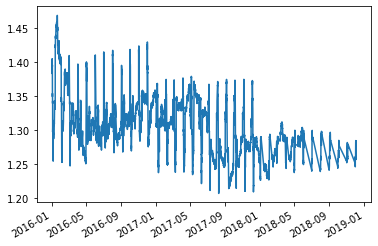

In [14]:
# Just some exploration 

df['Close'].plot()

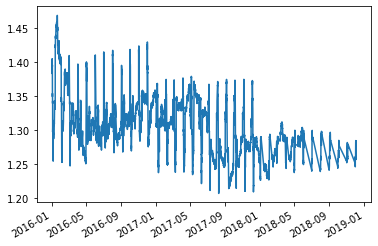

In [15]:
df_oil['Close_oil'].plot()

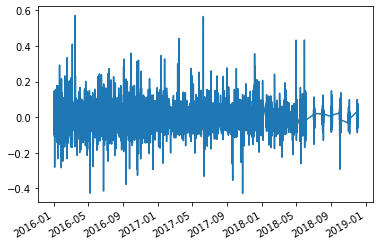

In [16]:
# Create return (open-close) normalized

df['return_next'] = df['Open'].shift(-1) - df['Close'].shift(-1)
return_range = df['return_next'].max() - df['return_next'].min()
df['return_next'] = df['return_next'] / return_range

df['return'] = df['Open'] - df['Close']
return_range = df['return'].max() - df['return'].min()
df['return'] = df['return'] / return_range

# If return > 0, green; otherwise, red

df['return'].plot()

In [17]:
# Make label, 1 as rising price, 0 as falling price - prediction for the following timestamp
# ****************** consider when return ==0 next version

df['label'] = df['return_next'].apply(lambda x: 1 if x>0.0 else 0)
df.tail(10)

,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return,label
2018-05-31 14:00:00,31.05.2018 14:00:00.000,1.29518,1.29770,1.29430,1.29718,9.841480e+09,2018-05-31 14:00:00,0.005464,-0.064288,1
2018-05-31 15:00:00,31.05.2018 15:00:00.000,1.29716,1.29903,1.29586,1.29699,1.169860e+10,2018-05-31 15:00:00,0.045002,0.005464,1
2018-05-31 16:00:00,31.05.2018 16:00:00.000,1.29699,1.29750,1.29555,1.29559,7.277670e+09,2018-05-31 16:00:00,-0.072324,0.045002,0
2018-05-31 17:00:00,31.05.2018 17:00:00.000,1.29560,1.29803,1.29424,1.29785,7.262840e+09,2018-05-31 17:00:00,0.071038,-0.072324,1
2018-05-31 18:00:00,31.05.2018 18:00:00.000,1.29785,1.29884,1.29538,1.29564,6.044530e+09,2018-05-31 18:00:00,-0.032144,0.071038,0
2018-05-31 19:00:00,31.05.2018 19:00:00.000,1.29566,1.29671,1.29541,1.29666,5.330320e+09,2018-05-31 19:00:00,0.033751,-0.032144,1
2018-05-31 20:00:00,31.05.2018 20:00:00.000,1.29668,1.29682,1.29502,1.29563,3.116830e+09,2018-05-31 20:00:00,-0.000321,0.033751,0
2018-05-31 21:00:00,31.05.2018 21:00:00.000,1.29563,1.29577,1.29498,1.29564,1.456650e+09,2018-05-31 21:00:00,0.049502,-0.000321,1
2018-05-31 22:00:00,31.05.2018 22:00:00.000,1.29563,1.29563,1.29407,1.29409,1.370330e+09,2018-05-31 22:00:00,-0.008679,0.049502,0
2018-05-31 23:00:00,31.05.2018 23:00:00.000,1.29409,1.29469,1.29406,1.29436,1.259850e+09,2018-05-31 23:00:00,NaN,-0.008679,0


In [18]:
# The last register shows a NaN

df.dropna(inplace=True)
df.tail()

,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return,label
2018-05-31 18:00:00,31.05.2018 18:00:00.000,1.29785,1.29884,1.29538,1.29564,6.044530e+09,2018-05-31 18:00:00,-0.032144,0.071038,0
2018-05-31 19:00:00,31.05.2018 19:00:00.000,1.29566,1.29671,1.29541,1.29666,5.330320e+09,2018-05-31 19:00:00,0.033751,-0.032144,1
2018-05-31 20:00:00,31.05.2018 20:00:00.000,1.29668,1.29682,1.29502,1.29563,3.116830e+09,2018-05-31 20:00:00,-0.000321,0.033751,0
2018-05-31 21:00:00,31.05.2018 21:00:00.000,1.29563,1.29577,1.29498,1.29564,1.456650e+09,2018-05-31 21:00:00,0.049502,-0.000321,1
2018-05-31 22:00:00,31.05.2018 22:00:00.000,1.29563,1.29563,1.29407,1.29409,1.370330e+09,2018-05-31 22:00:00,-0.008679,0.049502,0


In [19]:
df2 = df.copy()

df = df.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'label']]
df.tail()

,Open,High,Low,Close,Volume,return,label
2018-05-31 18:00:00,1.29785,1.29884,1.29538,1.29564,6.044530e+09,0.071038,0
2018-05-31 19:00:00,1.29566,1.29671,1.29541,1.29666,5.330320e+09,-0.032144,1
2018-05-31 20:00:00,1.29668,1.29682,1.29502,1.29563,3.116830e+09,0.033751,0
2018-05-31 21:00:00,1.29563,1.29577,1.29498,1.29564,1.456650e+09,-0.000321,1
2018-05-31 22:00:00,1.29563,1.29563,1.29407,1.29409,1.370330e+09,0.049502,0


In [20]:
df = pd.concat([df,df_oil],axis=1, join='inner')
df.head()

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2016-01-01 00:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0
2016-01-01 01:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0
2016-01-01 02:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0
2016-01-01 03:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0
2016-01-01 04:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0


In [21]:
# Creating datetime features


df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

df['hour'] = df.index.hour


df.head()

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2016-01-01 00:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,0
2016-01-01 01:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,1
2016-01-01 02:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,2
2016-01-01 03:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,3
2016-01-01 04:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,4


In [22]:
df.dtypes

# we have to change the volume type later

Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
return        float64
label           int64
Open_oil      float64
High_oil      float64
Low_oil       float64
Close_oil     float64
Volume_oil    float64
year            int64
month           int64
day             int64
hour            int64
dtype: object

## Choosing a timeframe to trade

In [23]:
# Limiting the dataframe: from 3:00 to 12:00 (10 timestamps) 

df = df.between_time(include_start=True,include_end=True, start_time='03:00:00', end_time='12:00:00')
df.tail(20)

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-05-30 03:00:00,1.30247,1.30350,1.30238,1.30303,2.623410e+09,-0.018001,1,1.30247,1.30350,1.30238,1.30303,2.623410e+09,2018,5,30,3
2018-05-30 04:00:00,1.30306,1.30314,1.30230,1.30260,1.692350e+09,0.014786,0,1.30306,1.30314,1.30230,1.30260,1.692350e+09,2018,5,30,4
2018-05-30 05:00:00,1.30259,1.30398,1.30234,1.30262,3.642960e+09,-0.000964,1,1.30259,1.30398,1.30234,1.30262,3.642960e+09,2018,5,30,5
2018-05-30 06:00:00,1.30266,1.30302,1.30143,1.30222,7.352290e+09,0.014143,1,1.30266,1.30302,1.30143,1.30222,7.352290e+09,2018,5,30,6
2018-05-30 07:00:00,1.30218,1.30279,1.30109,1.30148,7.621840e+09,0.022501,1,1.30218,1.30279,1.30109,1.30148,7.621840e+09,2018,5,30,7
2018-05-30 08:00:00,1.30152,1.30161,1.30047,1.30047,7.426750e+09,0.033751,1,1.30152,1.30161,1.30047,1.30047,7.426750e+09,2018,5,30,8
2018-05-30 09:00:00,1.30047,1.30049,1.29931,1.29958,7.103510e+09,0.028608,1,1.30047,1.30049,1.29931,1.29958,7.103510e+09,2018,5,30,9
2018-05-30 10:00:00,1.29959,1.29999,1.29813,1.29861,8.318910e+09,0.031501,1,1.29959,1.29999,1.29813,1.29861,8.318910e+09,2018,5,30,10
2018-05-30 11:00:00,1.29863,1.29885,1.29705,1.29715,6.624660e+09,0.047573,0,1.29863,1.29885,1.29705,1.29715,6.624660e+09,2018,5,30,11
2018-05-30 12:00:00,1.29717,1.29863,1.29527,1.29781,1.067015e+10,-0.020572,0,1.29717,1.29863,1.29527,1.29781,1.067015e+10,2018,5,30,12


In [24]:
# Make training and test dataset

df_test = df.loc['2018-05-31' ,:]  
display(df_test.head())
display(df_test.tail())

df_train = df.loc[:'2018-05-30',:] 
display(df_train.head())
display(df_train.tail())

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-05-31 03:00:00,1.28779,1.28788,1.28669,1.28719,2.857670e+09,0.019286,1,1.28779,1.28788,1.28669,1.28719,2.857670e+09,2018,5,31,3
2018-05-31 04:00:00,1.28719,1.28725,1.28647,1.28677,1.907510e+09,0.013500,1,1.28719,1.28725,1.28647,1.28677,1.907510e+09,2018,5,31,4
2018-05-31 05:00:00,1.28677,1.28707,1.28598,1.28673,3.887940e+09,0.001286,0,1.28677,1.28707,1.28598,1.28673,3.887940e+09,2018,5,31,5
2018-05-31 06:00:00,1.28678,1.28758,1.28654,1.28734,6.998760e+09,-0.018001,1,1.28678,1.28758,1.28654,1.28734,6.998760e+09,2018,5,31,6
2018-05-31 07:00:00,1.28735,1.28747,1.28452,1.28482,7.630360e+09,0.081324,1,1.28735,1.28747,1.28452,1.28482,7.630360e+09,2018,5,31,7


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-05-31 08:00:00,1.28484,1.28538,1.28356,1.28400,5.385360e+09,0.027001,0,1.28484,1.28538,1.28356,1.28400,5.385360e+09,2018,5,31,8
2018-05-31 09:00:00,1.28400,1.28539,1.28394,1.28470,5.552970e+09,-0.022501,1,1.28400,1.28539,1.28394,1.28470,5.552970e+09,2018,5,31,9
2018-05-31 10:00:00,1.28472,1.28583,1.28180,1.28259,5.881380e+09,0.068467,0,1.28472,1.28583,1.28180,1.28259,5.881380e+09,2018,5,31,10
2018-05-31 11:00:00,1.28264,1.28514,1.28251,1.28474,6.608530e+09,-0.067502,0,1.28264,1.28514,1.28251,1.28474,6.608530e+09,2018,5,31,11
2018-05-31 12:00:00,1.28474,1.28987,1.28472,1.28985,1.079586e+10,-0.164256,0,1.28474,1.28987,1.28472,1.28985,1.079586e+10,2018,5,31,12


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2016-01-01 03:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,3
2016-01-01 04:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,4
2016-01-01 05:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,5
2016-01-01 06:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,6
2016-01-01 07:00:00,1.38326,1.38326,1.38326,1.38326,0.0,0.0,0,1.38326,1.38326,1.38326,1.38326,0.0,2016,1,1,7


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-05-30 08:00:00,1.30152,1.30161,1.30047,1.30047,7.426750e+09,0.033751,1,1.30152,1.30161,1.30047,1.30047,7.426750e+09,2018,5,30,8
2018-05-30 09:00:00,1.30047,1.30049,1.29931,1.29958,7.103510e+09,0.028608,1,1.30047,1.30049,1.29931,1.29958,7.103510e+09,2018,5,30,9
2018-05-30 10:00:00,1.29959,1.29999,1.29813,1.29861,8.318910e+09,0.031501,1,1.29959,1.29999,1.29813,1.29861,8.318910e+09,2018,5,30,10
2018-05-30 11:00:00,1.29863,1.29885,1.29705,1.29715,6.624660e+09,0.047573,0,1.29863,1.29885,1.29705,1.29715,6.624660e+09,2018,5,30,11
2018-05-30 12:00:00,1.29717,1.29863,1.29527,1.29781,1.067015e+10,-0.020572,0,1.29717,1.29863,1.29527,1.29781,1.067015e+10,2018,5,30,12


In [25]:
df_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'label', 'Open_oil',
       'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil', 'year', 'month',
       'day', 'hour'],
      dtype='object')

## Applying a model

In [26]:
# Separate features and output

y_train = df_train['label']
X_train = df_train.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'Open_oil', 'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil',
       'year', 'month', 'day', 'hour']]

y_test = df_test['label']
X_test = df_test.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'Open_oil', 'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil',
       'year', 'month', 'day', 'hour']]


In [27]:
print(X_test.shape)
print(y_test.shape)

print('%% of Class0 : %f y_test' % (np.count_nonzero(y_test == 0)/float(len(y_test))))
print('%% of Class1 : %f y_test' % (np.count_nonzero(y_test == 1)/float(len(y_test))))

(10, 15)
(10,)
% of Class0 : 0.500000 y_test
% of Class1 : 0.500000 y_test


In [28]:
print(X_train.shape)
print(y_train.shape)

print('%% of Class0 : %f y_train' % (np.count_nonzero(y_train == 0)/float(len(y_train))))
print('%% of Class1 : %f y_train' % (np.count_nonzero(y_train == 1)/float(len(y_train))))

(6040, 15)
(6040,)
% of Class0 : 0.513742 y_train
% of Class1 : 0.486258 y_train


In [29]:
# Define Model and fit


clf = ensemble.GradientBoostingClassifier(verbose=3)

clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3840            5.83s
         2           1.3827            4.69s
         3           1.3815            4.26s
         4           1.3805            4.02s
         5           1.3796            3.90s
         6           1.3786            3.87s
         7           1.3777            3.79s
         8           1.3769            3.70s
         9           1.3756            3.61s
        10           1.3749            3.55s
        11           1.3734            3.53s
        12           1.3725            3.48s
        13           1.3713            3.42s
        14           1.3704            3.36s
        15           1.3695            3.32s
        16           1.3687            3.27s
        17           1.3674            3.25s
        18           1.3664            3.19s
        19           1.3655            3.14s
        20           1.3651            3.09s
        21           1.3648            3.05s
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=3,
                           warm_start=False)

## How accurate is this model?

In [30]:
accuracy = clf.score(X_train, y_train)
print('Testing Accuracy: %f' % accuracy)

Testing Accuracy: 0.630298


In [31]:
# Predict test data

pred = clf.predict(X_test)

In [32]:
# Comparing predicted and label

df_trade = pd.DataFrame(X_test)
df_trade['label']  = y_test
df_trade['pred']   = pred
df_trade['won']    = df_trade['label'] == df_trade['pred']

df_trade

,Open,High,Low,Close,Volume,return,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour,label,pred,won
2018-05-31 03:00:00,1.28779,1.28788,1.28669,1.28719,2.857670e+09,0.019286,1.28779,1.28788,1.28669,1.28719,2.857670e+09,2018,5,31,3,1,0,False
2018-05-31 04:00:00,1.28719,1.28725,1.28647,1.28677,1.907510e+09,0.013500,1.28719,1.28725,1.28647,1.28677,1.907510e+09,2018,5,31,4,1,0,False
2018-05-31 05:00:00,1.28677,1.28707,1.28598,1.28673,3.887940e+09,0.001286,1.28677,1.28707,1.28598,1.28673,3.887940e+09,2018,5,31,5,0,0,True
2018-05-31 06:00:00,1.28678,1.28758,1.28654,1.28734,6.998760e+09,-0.018001,1.28678,1.28758,1.28654,1.28734,6.998760e+09,2018,5,31,6,1,1,True
2018-05-31 07:00:00,1.28735,1.28747,1.28452,1.28482,7.630360e+09,0.081324,1.28735,1.28747,1.28452,1.28482,7.630360e+09,2018,5,31,7,1,1,True
2018-05-31 08:00:00,1.28484,1.28538,1.28356,1.28400,5.385360e+09,0.027001,1.28484,1.28538,1.28356,1.28400,5.385360e+09,2018,5,31,8,0,0,True
2018-05-31 09:00:00,1.28400,1.28539,1.28394,1.28470,5.552970e+09,-0.022501,1.28400,1.28539,1.28394,1.28470,5.552970e+09,2018,5,31,9,1,0,False
2018-05-31 10:00:00,1.28472,1.28583,1.28180,1.28259,5.881380e+09,0.068467,1.28472,1.28583,1.28180,1.28259,5.881380e+09,2018,5,31,10,0,0,True
2018-05-31 11:00:00,1.28264,1.28514,1.28251,1.28474,6.608530e+09,-0.067502,1.28264,1.28514,1.28251,1.28474,6.608530e+09,2018,5,31,11,0,0,True
2018-05-31 12:00:00,1.28474,1.28987,1.28472,1.28985,1.079586e+10,-0.164256,1.28474,1.28987,1.28472,1.28985,1.079586e+10,2018,5,31,12,0,1,False


In [33]:
# Didnt won and won

print(df_trade[df_trade['won'] == False]['won'].count())
print(df_trade[df_trade['won'] == True]['won'].count())

4
6


In [34]:
# % of won

df_trade[df_trade['won'] == True]['won'].count()/df_trade['won'].count()

0.6